In [9]:
# importing the libraries
# import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# for creating validation set
# from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

# model imports
from sklearn import svm

# Dataloader
from dataloader import DriverDataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# load dataset

dataset = DriverDataset(shuffle=False)

In [11]:
# split data into train and test
gray = True
edges = True
np.random.seed(0)
train_data, test_data = dataset.split_dataset(17777)
n_train = train_data[0].shape[0]
n_test = test_data[0].shape[0]
X_train, people_train, y_train = dataset.make_batch(train_data, n_train, gray=gray, edges=edges)
X_test, people_test, y_test = dataset.make_batch(test_data, n_test, gray=gray, edges=edges)

In [12]:
# flatten image data
if (not gray):
    N, H, W, C = X_train.shape
    X_train = np.reshape(X_train, (N, H*W*C))    
    X_test = np.reshape(X_test, (X_test.shape[0], H*W*C))
else:
    N, H, W = X_train.shape
    X_train = np.reshape(X_train, (N, H*W))
    X_test = np.reshape(X_test, (X_test.shape[0], H*W))

In [13]:
# instantiate multiple SVM classifiers to play around with (this cell takes a looooong time to run so don't do it unless you need to retrain data ~30mins)
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [14]:
# predict
# rbf_pred = rbf.predict(X_test)
poly_pred_train = poly.predict(X_train)
poly_pred_test = poly.predict(X_test)

Train Accuracy (Polynomial Kernel):  99.99
Train F1 (Polynomial Kernel):  99.99
Test Accuracy (Polynomial Kernel):  13.56
Test F1 (Polynomial Kernel):  7.53


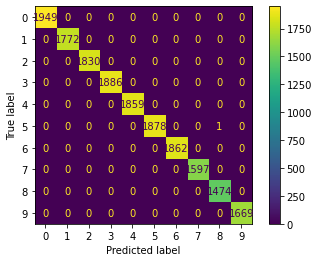

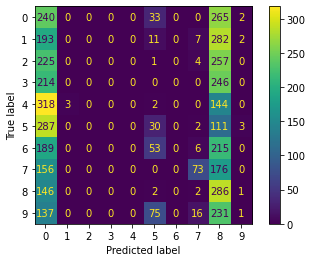

In [15]:
# evaluate model
# rbf_accuracy = accuracy_score(y_test, rbf_pred)
# rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
# print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
# print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

poly_accuracy_train = accuracy_score(y_train, poly_pred_train)
poly_accuracy_test = accuracy_score(y_test, poly_pred_test)
poly_f1_train = f1_score(y_train, poly_pred_train, average='weighted')
poly_f1_test = f1_score(y_test, poly_pred_test, average='weighted')

print('Train Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_train*100))
print('Train F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_train*100))

print('Test Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_test*100))
print('Test F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_test*100))

cm = confusion_matrix(y_train, poly_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = confusion_matrix(y_test, poly_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 